In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X,Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)
print(X.shape,Y.shape)

(500, 2) (500,)


In [4]:
X

array([[  5.83801528,  -9.29715058],
       [  5.67102739,  -9.76225984],
       [  3.15598083,   5.95298368],
       [  3.87586762,   5.94663718],
       [  3.94478532,   4.85652467],
       [  2.82983681,   4.85628288],
       [  4.99059695,  -9.04869246],
       [  5.31414039,  -9.94714146],
       [  2.37830662,   4.78915634],
       [  2.54234378,   5.46906286],
       [  3.64313269,   5.42712386],
       [  3.88101257,  -9.59334486],
       [  6.04666737, -10.65352872],
       [  1.65611544,   5.46167742],
       [  3.74596695,  -8.90825282],
       [  7.03787016,  -9.34562175],
       [  5.88730132,  -8.922587  ],
       [  3.24365815,   4.46320246],
       [  2.54406041,   6.89173024],
       [  2.44257249,   6.84606548],
       [  4.94431973,  -9.4953734 ],
       [  4.4198443 ,  -9.84249464],
       [  4.71934142,  -9.03829618],
       [  6.1858842 ,  -9.61888801],
       [  5.18940868,  -9.52767586],
       [  6.40648699, -11.98053303],
       [  6.97157463, -10.27664867],
 

In [5]:
Y

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [6]:
plt.style.use("seaborn")

C:\Users\hp\AppData\Local\Temp\ipykernel_1772\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


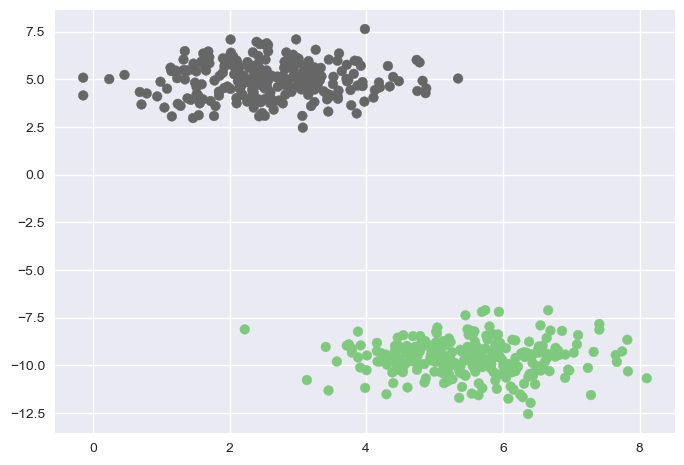

In [7]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

# Model

In [8]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [17]:
def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/float(m)
    return weights

def train(X,Y,learning_rate,maxEpochs=100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    weights = np.zeros(X.shape[1])
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        if epoch%10 == 0:
            l = loss(X,Y,weights)
            print("Epoch Number %d Loss %.4f"%(epoch,l))
            
    return weights

In [21]:
weights = train(X,Y,learning_rate=0.01,maxEpochs=500)

Epoch Number 0 Loss 0.5665
Epoch Number 10 Loss 0.2029
Epoch Number 20 Loss 0.1275
Epoch Number 30 Loss 0.0937
Epoch Number 40 Loss 0.0742
Epoch Number 50 Loss 0.0616
Epoch Number 60 Loss 0.0527
Epoch Number 70 Loss 0.0460
Epoch Number 80 Loss 0.0409
Epoch Number 90 Loss 0.0368
Epoch Number 100 Loss 0.0335
Epoch Number 110 Loss 0.0307
Epoch Number 120 Loss 0.0284
Epoch Number 130 Loss 0.0264
Epoch Number 140 Loss 0.0247
Epoch Number 150 Loss 0.0232
Epoch Number 160 Loss 0.0218
Epoch Number 170 Loss 0.0206
Epoch Number 180 Loss 0.0196
Epoch Number 190 Loss 0.0186
Epoch Number 200 Loss 0.0178
Epoch Number 210 Loss 0.0170
Epoch Number 220 Loss 0.0162
Epoch Number 230 Loss 0.0156
Epoch Number 240 Loss 0.0150
Epoch Number 250 Loss 0.0144
Epoch Number 260 Loss 0.0139
Epoch Number 270 Loss 0.0134
Epoch Number 280 Loss 0.0130
Epoch Number 290 Loss 0.0126
Epoch Number 300 Loss 0.0122
Epoch Number 310 Loss 0.0118
Epoch Number 320 Loss 0.0115
Epoch Number 330 Loss 0.0111
Epoch Number 340 Loss 0.0

# Visualisation and Predictions

In [20]:
def get_predict(X_test,weights):
    if X_test[1] != weights.shape[0]:
        ones = np.one(X_test.shape[0],1)
        X_test = np.hstack(ones,x_test)
        
    probs = predict(X_test,weights)
    
    if not labels:
        return probs
    else:
        labels = n.zeros(probs.shape)
        labels[probs >= 0.5] = 1
        return labels

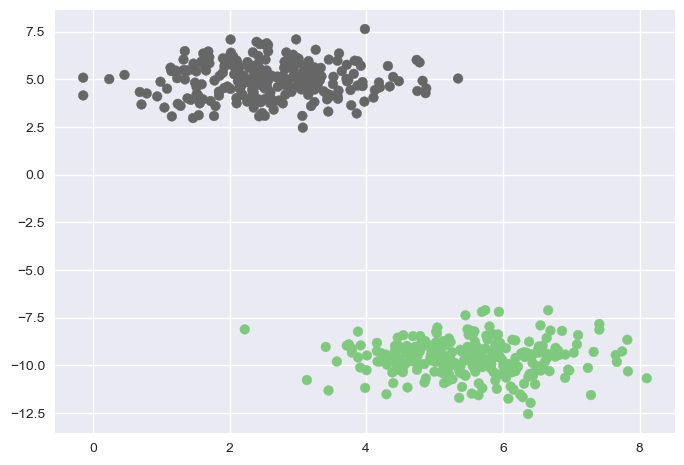

In [22]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [23]:
weights

array([0.09219021, 0.14467306, 0.8271422 ])

In [24]:
x1 = np.linspace(-2,10,10)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]
print(x2)

[-2.         -0.66666667  0.66666667  2.          3.33333333  4.66666667
  6.          7.33333333  8.66666667 10.        ]
[ 0.23835793  0.00514844 -0.22806105 -0.46127054 -0.69448003 -0.92768952
 -1.16089901 -1.3941085  -1.62731799 -1.86052748]


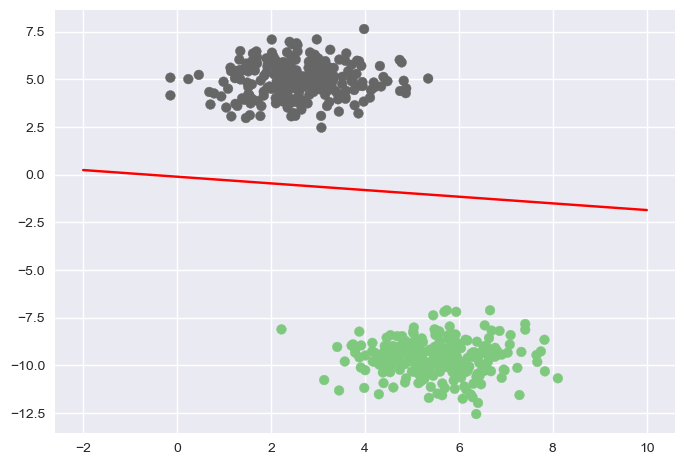

In [25]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c="red")
plt.show()